# Age-sex joint distributions from E_Detect-TB data 

Data from the [E-DETECT TB consortium](https://e-detecttb.eu/) records numbers of TB screenings for people entering the UK, stratified by year, country, age group, sex and visa category. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# FUNCTIONS...

# Takes a sub-dataframe, extracts the age/sex categories and normalises to one.
def getNormedAgeSexDistr2(test_df):
    ID_grouped = test_df.groupby('Name')
    ID_sum = ID_grouped['n_screened'].agg(np.sum)

    b_dict = {x: i for i, x in enumerate(ID_sum.index)}
    indices = [b_dict.get(x, None) for x in names]

    qq = np.array([ID_sum.values[i] if i is not None else 0 for i in indices])
    return qq/(np.sum(qq)+0.001)


# Takes a sub-dataframe, extracts the age/sex categories and but DOESN'T normalise to one.
def getNormedAgeSexDistrN(test_df):
    ID_grouped = test_df.groupby('Name')
    ID_sum = ID_grouped['n_screened'].agg(np.sum)

    b_dict = {x: i for i, x in enumerate(ID_sum.index)}
    indices = [b_dict.get(x, None) for x in names]

    qq = np.array([ID_sum.values[i] if i is not None else 0 for i in indices])
    return qq


# Read in the data...
# The data is a cleaned version of clean_edetecttb_11oct_withregion.csv that was prepared by Laura. 
fileName = 'clean_edetecttb_JET.csv'

E_DET_TB_data = pd.read_csv(fileName, comment='#')
E_DET_TB_data['sex'] = E_DET_TB_data['sex'].astype(str)

colNames = E_DET_TB_data.columns.values

# re-order the columns to put the counts at the end. 
newColOrder = [colNames[x] for x in [0, 1, 2, 4, 5, 6, 3]]
E_DET_TB_data = E_DET_TB_data[newColOrder]

# Clean data...
# Remove 'Missing' in 'sex'. 'age_grps', 'year'
sexMissingFilter = E_DET_TB_data['sex'].isin(['Missing'])
ageGroupMissingFilter = E_DET_TB_data['age_grps'].isin(['Missing'])
yearMissingFilter = E_DET_TB_data['year'].isin(['Missing'])
visaMissingFilter = E_DET_TB_data['visa_type'].isin(['Missing'])
totalFilter = sexMissingFilter.values | ageGroupMissingFilter.values \
    | yearMissingFilter.values | visaMissingFilter.values

# totalFilter = totalFilter == False  # Seriously, this is how to 'not'? 
totalFilter = [not x for x in totalFilter]

E_DET_TB_Filtered_data = E_DET_TB_data[totalFilter]

allAgeGroups = np.unique(E_DET_TB_Filtered_data['age_grps'])
# re-order... 
reOrder = [0, 10, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 
           15, 16, 17, 18, 19, 20, 2]
allAgeGroups = [allAgeGroups[x] for x in reOrder]

Below is a summary of the colmns in the data and the range of values each contains. 

In [2]:
nRows = E_DET_TB_Filtered_data.shape[0]
print('Rows: ', nRows)

colNames = E_DET_TB_Filtered_data.columns.values

# Print out all the unique values in each column...
for n, v in E_DET_TB_Filtered_data[colNames[:-1]].iteritems():
    print(n, np.unique(v))

Rows:  41526
sex ['Female' 'Male']
age_grps ['0-4' '10-14' '100+' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44'
 '45-49' '5-9' '50-54' '55-59' '60-64' '65-69' '70-74' '75-79' '80-84'
 '85-89' '90-94' '95-99']
year ['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018']
country ['Afghanistan' 'Algeria' 'Angola' 'Azerbaijan' 'Bangladesh' 'Belarus'
 'Bhutan' 'Botswana' 'Brunei' 'Cambodia' 'Cameroon' 'China' 'CoteDivoire'
 'DRC' 'DominicanRepublic' 'Ecuador' 'Ethiopia' 'Gambia' 'Georgia' 'Ghana'
 'Guyana' 'Haiti' 'HongKong' 'India' 'Indonesia' 'Iraq' 'Jordan'
 'Kazakhstan' 'Kenya' 'Madagascar' 'Malawi' 'Malaysia' 'Moldova'
 'Mongolia' 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Nigeria'
 'Pakistan' 'Paraguay' 'Peru' 'Philippines' 'Russia' 'Rwanda' 'Senegal'
 'SierraLeone' 'SouthAfrica' 'SouthKorea' 'SriLanka' 'Sudan' 'Tanzania'
 'Thailand' 'Uganda' 'Ukraine' 'Uzbekistan' 'Vietnam' 'Zambia' 'Zimbabwe']
visa_type ['UK Family Reunificatio

In [3]:
# desired visa types and regions. 
visaSet = ['UK Settlement', 'UK Family Reunification', 'UK Student', 'UK Work']
regions = ['China', 'Bangladesh', 'India', 'Pakistan']

print('Visa categories considered:')
print(visaSet)
print('\nRegions considered:')
print(regions)

# Data before 2015 is dodgy, so filter it out. 
filterYears = E_DET_TB_Filtered_data['year'].values.astype(int) >= 2015

# Just the following regions...
filterCountries = E_DET_TB_Filtered_data['region'].isin(regions).values

# filter the desired visas.
filterVisas = E_DET_TB_Filtered_data['visa_type'].isin(visaSet).values

E_DET_TB_Filtered_data = E_DET_TB_Filtered_data[filterYears &
                                                filterCountries & filterVisas]

nRows = E_DET_TB_Filtered_data.shape[0]

# Create the categories of age and sex groupings, in order. 
# 20 5 year groups and two sexes. 
sexes = ['M', 'F'] 
N = 20
names = [sexes[i//N] + ':' + str(i % N*5) + '-' + str(i % N*5+4) \
         for i in range(2*N)]

years = np.unique(E_DET_TB_Filtered_data['year'])

# Create some ids for the categories of sex and age. 
aa = list(E_DET_TB_Filtered_data['sex'].values)
bb = list(E_DET_TB_Filtered_data['age_grps'].values)
E_DET_TB_Filtered_data['Name'] = [aa[i][0] + ':' + bb[i] for i in range(nRows)]


# Group by country and visa. 
grouped = E_DET_TB_Filtered_data.groupby(['region', 'visa_type'])
# Apply normalisation function to groups. 
MeanAgeSexDistrByCV = grouped.apply(getNormedAgeSexDistr2)

# Check normalisation... 
# test = [np.sum(x) for x in MeanAgeSexDistrByCV]

# group by region, visa_type and year.
grouped2 = E_DET_TB_Filtered_data.groupby(['region', 'visa_type', 'year'])

meanByCVYear = grouped2.apply(getNormedAgeSexDistr2)

Visa categories considered:
['UK Settlement', 'UK Family Reunification', 'UK Student', 'UK Work']

Regions considered:
['China', 'Bangladesh', 'India', 'Pakistan']


Our assumption is that the age and sex distribution of immigrants is a function of the country of origin and the visa type, but independent of the year of entry and the number of immigrants. As such, we construct a joint age/sex distribution for imigrants by averaging over a number of entry years. Currently, only entry years of 2015 and later are used, as prior to this, the data is not reliable. For a given country of origin and visa type, if $n_{ij}$ is the number of individuals screened in age/sex category $i$ and entry year $j$, then probability for age/sex category $i$ is 
$$ 
p_i \propto \sum_j n_{ij},
$$
normalised to 1. Hence entry years with fewer screenings contribute less. 

The following panels show the mean age/sex distributions by country and visa category, along with the distributions for the years from which they are constituted. This gives an idea of how strong the assumption of time-independence is. 

### Normalised distributions

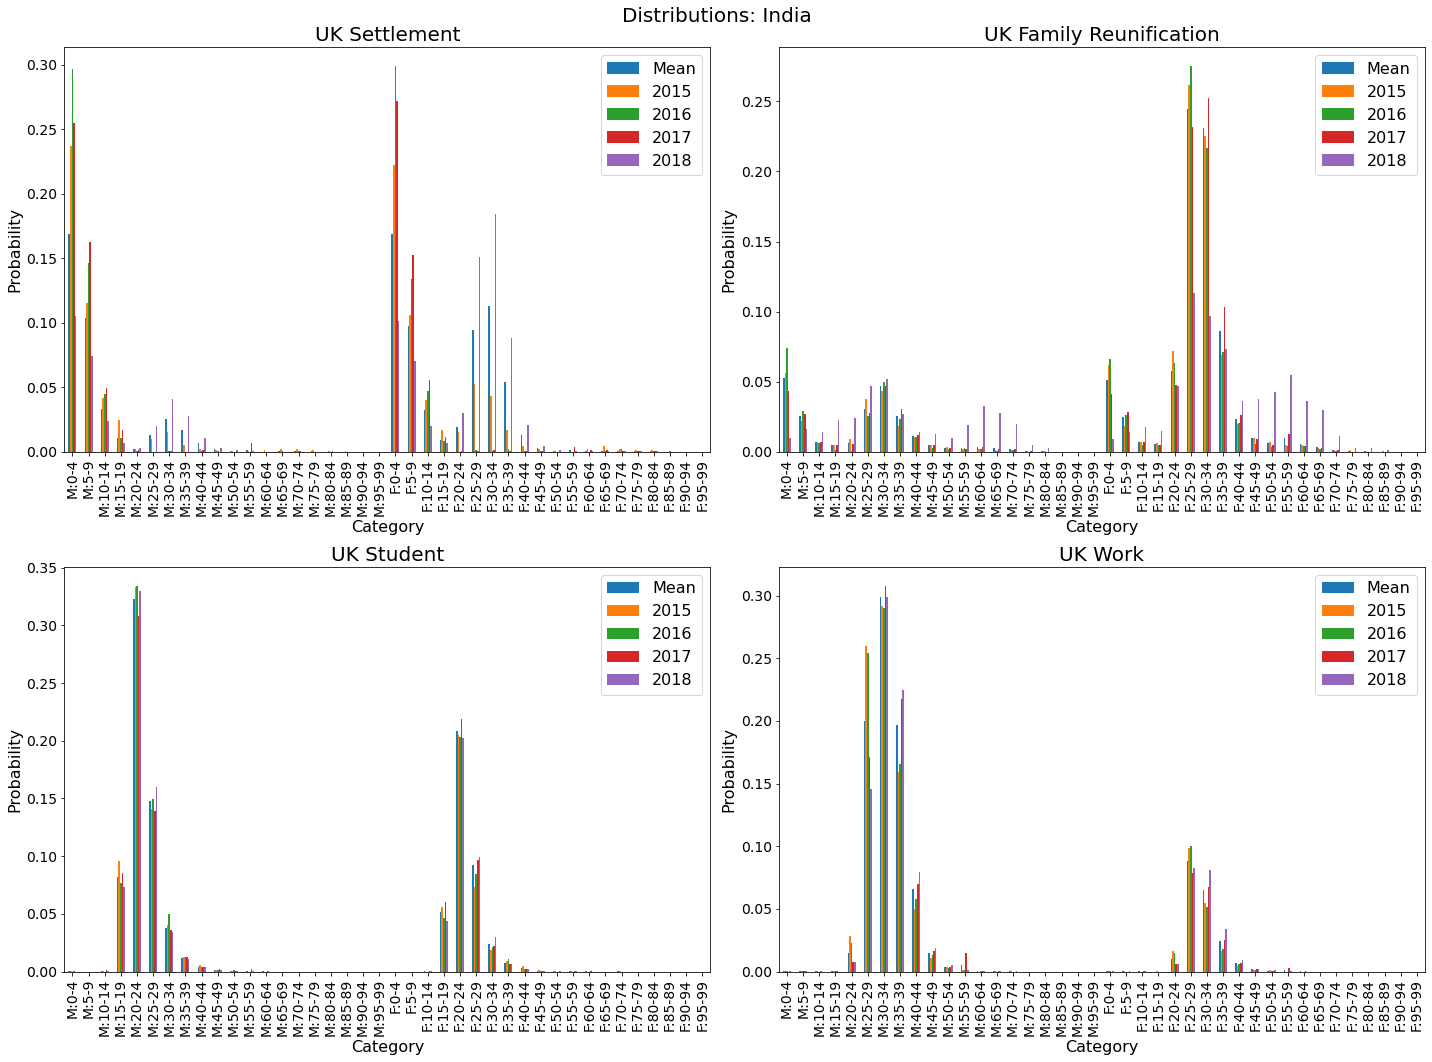

In [4]:
currentRegion = 'India'

n_cols = 2
n_rows = 2
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows)

for i in range(n_cols*n_rows):
    i_row = i // n_cols
    i_col = i % n_cols
    currentVisa = visaSet[i]
    currentAx = ax[i_row, i_col]
    CV = (currentRegion, currentVisa)
    currentMean = MeanAgeSexDistrByCV[CV]

    plot_df = pd.DataFrame({'Labels': names,
                            'Mean': currentMean})

    for y in years:
        currentIndex = CV + (y,)
        plot_df[y] = meanByCVYear[currentIndex]

    plot_df.plot.bar(x='Labels', rot=90, ax=currentAx)
    currentAx.set_title(currentVisa, fontsize=20)
    currentAx.set_ylabel('Probability', fontsize=16)
    currentAx.set_xlabel('Category', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=14)
    currentAx.legend(fontsize=16)


fig.set_size_inches(20, 7.5*n_rows)
fig.suptitle(f'Distributions: {currentRegion}', fontsize=20)
fig.tight_layout()
plt.show()

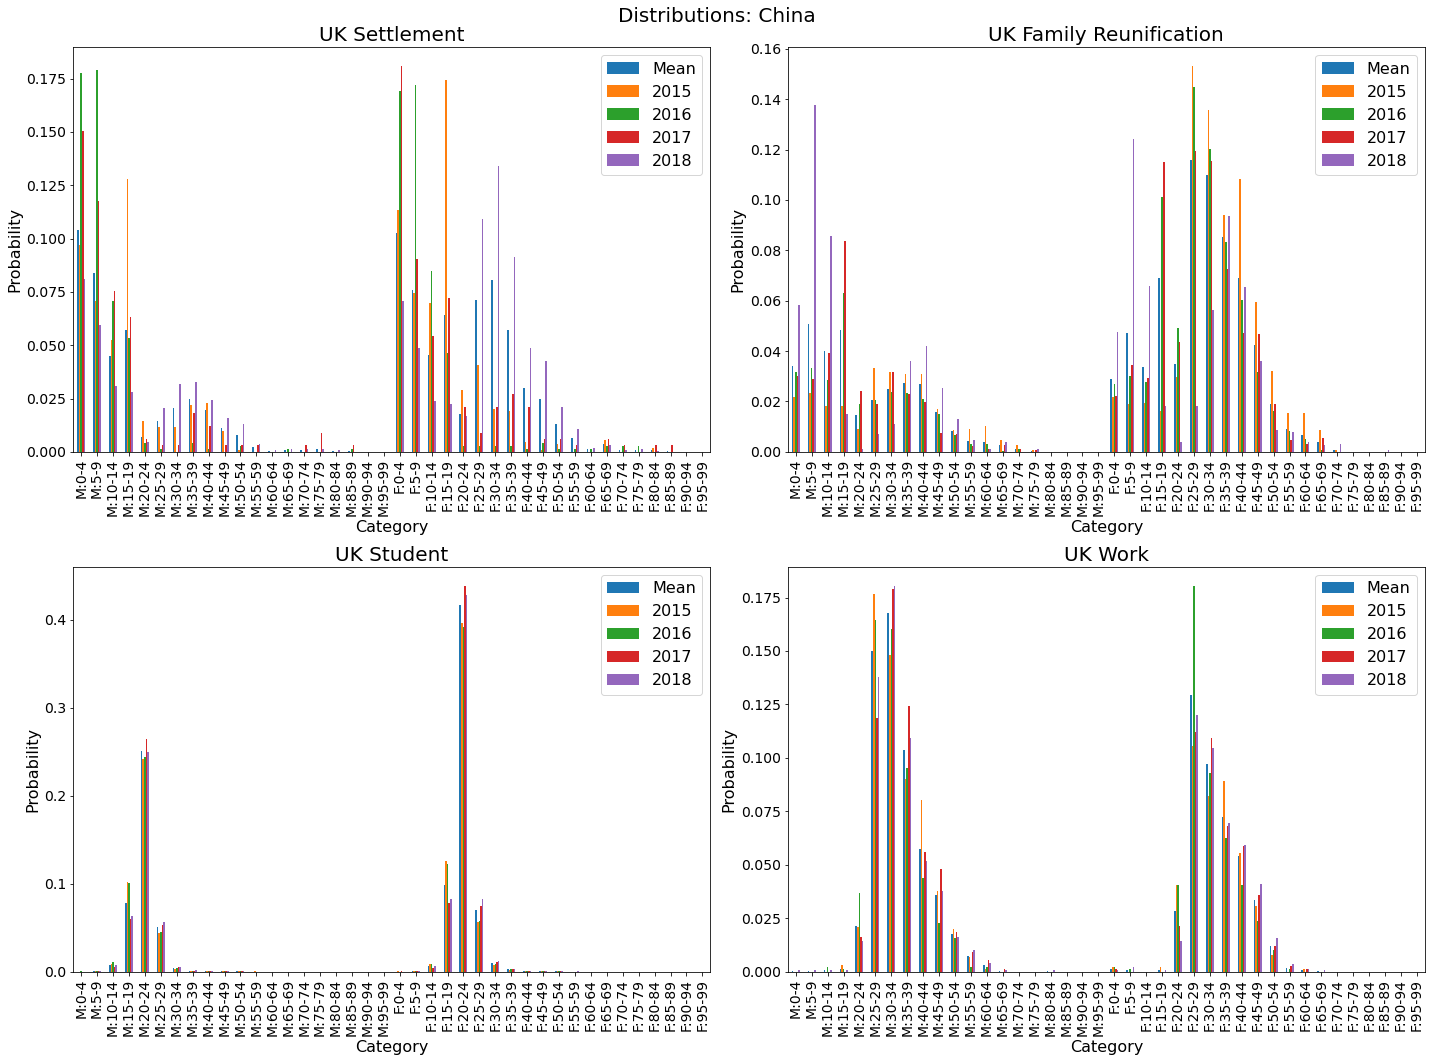

In [5]:
currentRegion = 'China'

n_cols = 2
n_rows = 2
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows)

for i in range(n_cols*n_rows):
    i_row = i // n_cols
    i_col = i % n_cols
    currentVisa = visaSet[i]
    currentAx = ax[i_row, i_col]
    CV = (currentRegion, currentVisa)
    currentMean = MeanAgeSexDistrByCV[CV]

    plot_df = pd.DataFrame({'Labels': names,
                            'Mean': currentMean})

    for y in years:
        currentIndex = CV + (y,)
        plot_df[y] = meanByCVYear[currentIndex]

    plot_df.plot.bar(x='Labels', rot=90, ax=currentAx)
    currentAx.set_title(currentVisa, fontsize=20)
    currentAx.set_ylabel('Probability', fontsize=16)
    currentAx.set_xlabel('Category', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=14)
    currentAx.legend(fontsize=16)


fig.set_size_inches(20, 7.5*n_rows)
fig.suptitle(f'Distributions: {currentRegion}', fontsize=20)
fig.tight_layout()
plt.show()

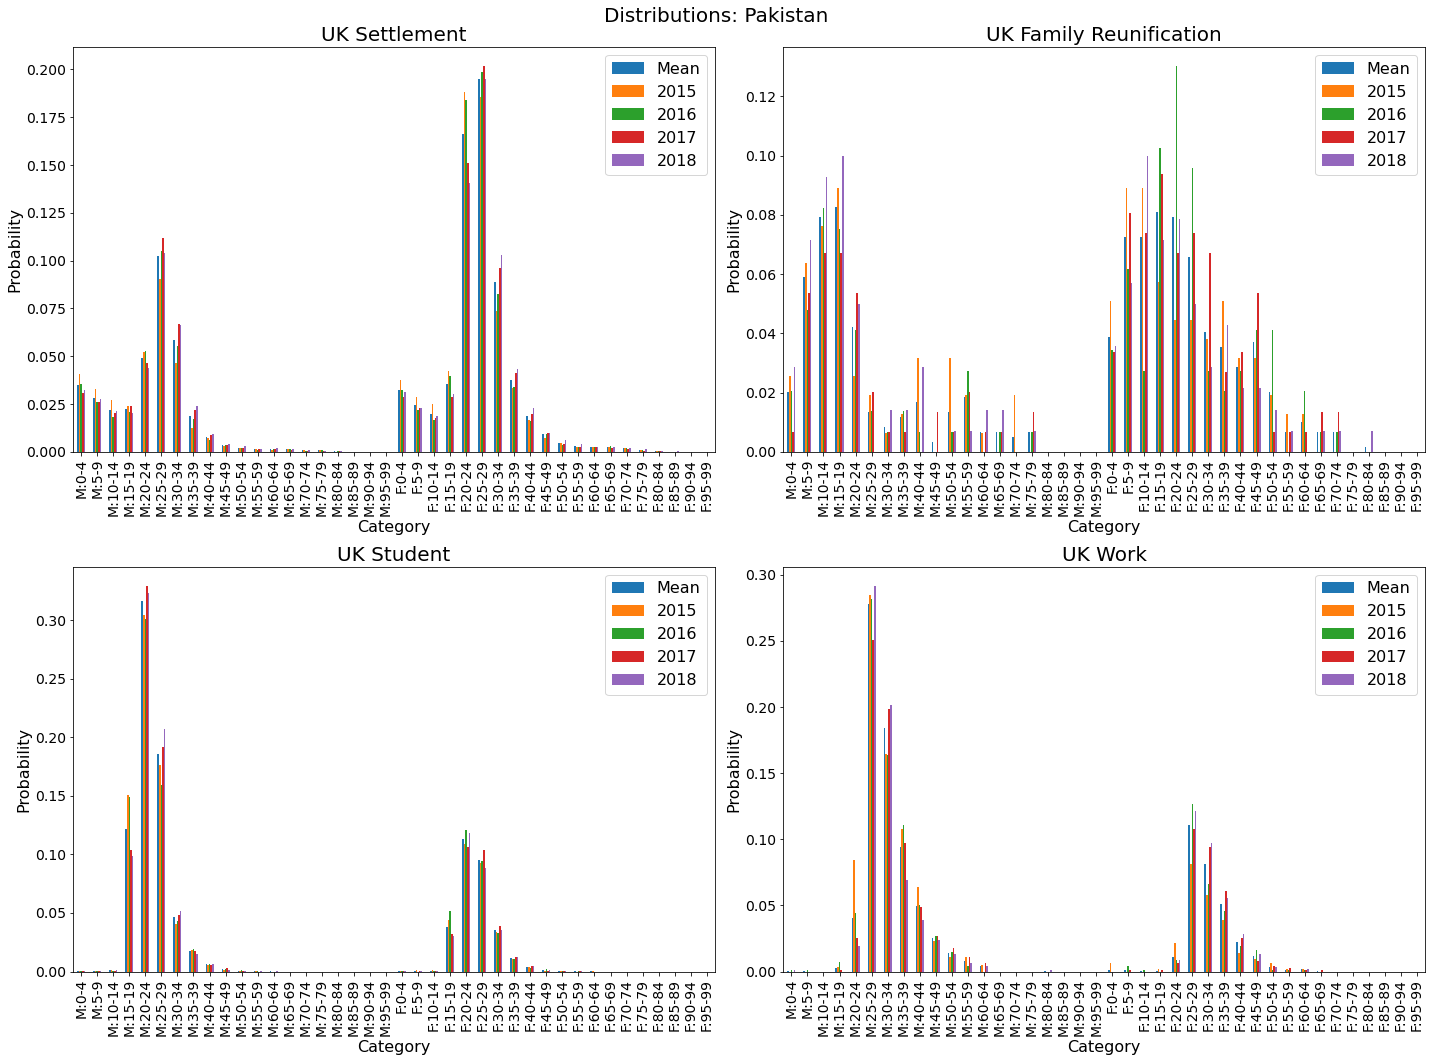

In [6]:
currentRegion = 'Pakistan'

n_cols = 2
n_rows = 2
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows)

for i in range(n_cols*n_rows):
    i_row = i // n_cols
    i_col = i % n_cols
    currentVisa = visaSet[i]
    currentAx = ax[i_row, i_col]
    CV = (currentRegion, currentVisa)
    currentMean = MeanAgeSexDistrByCV[CV]

    plot_df = pd.DataFrame({'Labels': names,
                            'Mean': currentMean})

    for y in years:
        currentIndex = CV + (y,)
        plot_df[y] = meanByCVYear[currentIndex]

    plot_df.plot.bar(x='Labels', rot=90, ax=currentAx)
    currentAx.set_title(currentVisa, fontsize=20)
    currentAx.set_ylabel('Probability', fontsize=16)
    currentAx.set_xlabel('Category', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=14)
    currentAx.legend(fontsize=16)


fig.set_size_inches(20, 7.5*n_rows)
fig.suptitle(f'Distributions: {currentRegion}', fontsize=20)
fig.tight_layout()
plt.show()

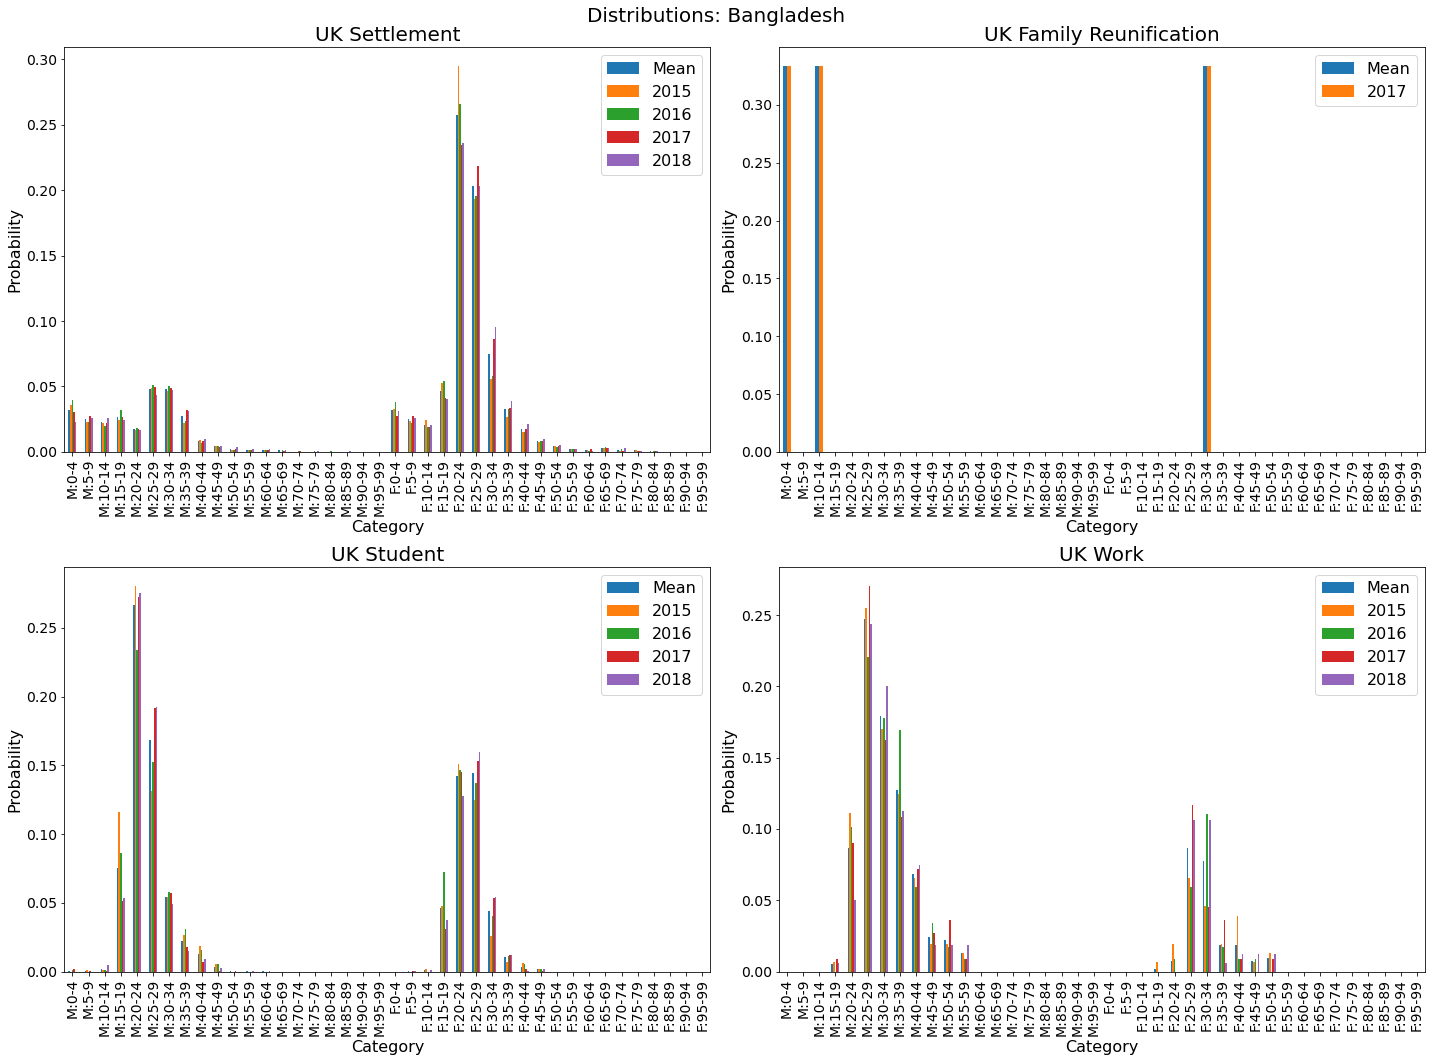

In [7]:
currentRegion = 'Bangladesh'

n_cols = 2
n_rows = 2
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows)

for i in range(4):
    # if i == 1:
    #    continue
    i_row = i // n_cols
    i_col = i % n_cols
    currentVisa = visaSet[i]
    currentAx = ax[i_row, i_col]
    CV = (currentRegion, currentVisa)
    currentMean = MeanAgeSexDistrByCV[CV]

    plot_df = pd.DataFrame({'Labels': names,
                            'Mean': currentMean})

    for y in years:
        currentIndex = CV + (y,)
        if not np.any(meanByCVYear.index.isin([currentIndex])):
            continue
        plot_df[y] = meanByCVYear[currentIndex]

    plot_df.plot.bar(x='Labels', rot=90, ax=currentAx)
    currentAx.set_title(currentVisa, fontsize=20)
    currentAx.set_ylabel('Probability', fontsize=16)
    currentAx.set_xlabel('Category', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=14)
    currentAx.legend(fontsize=16)


fig.set_size_inches(20, 7.5*n_rows)
fig.suptitle(f'Distributions: {currentRegion}', fontsize=20)
fig.tight_layout()
plt.show()

***
### Distribution of numbers screened
Visualising in terms of the numbers screened may throw some light on the changes in the distributions wiht time.  

In [8]:
# apply the total number function to the grouping. 
totalByCVYear = grouped2.apply(getNormedAgeSexDistrN)

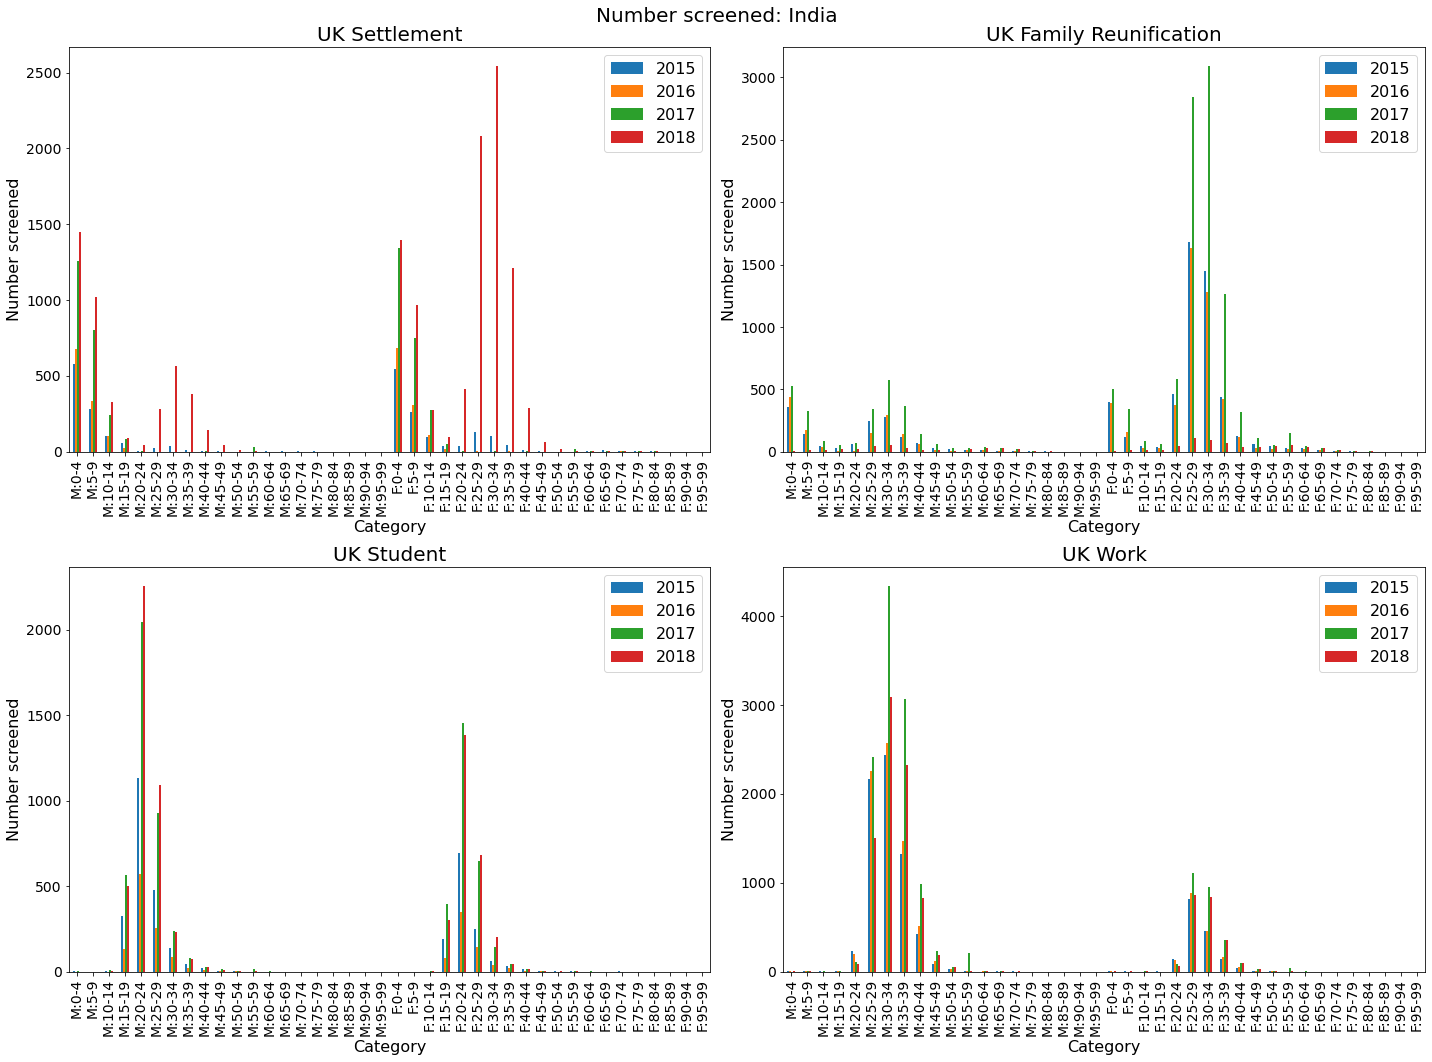

In [9]:
currentRegion = 'India'

n_cols = 2
n_rows = 2
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows)

for i in range(n_cols*n_rows):
    i_row = i // n_cols
    i_col = i % n_cols
    currentVisa = visaSet[i]
    currentAx = ax[i_row, i_col]
    CV = (currentRegion, currentVisa)
    currentMean = MeanAgeSexDistrByCV[CV]

    plot_df = pd.DataFrame({'Labels': names,
                            'Mean': currentMean})

    for y in years:
        currentIndex = CV + (y,)
        plot_df[y] = totalByCVYear[currentIndex]

    plot_df.plot.bar(x='Labels', y=years, rot=90, ax=currentAx)
    currentAx.set_title(currentVisa, fontsize=20)
    currentAx.set_ylabel('Number screened', fontsize=16)
    currentAx.set_xlabel('Category', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=14)
    currentAx.legend(fontsize=16)


fig.set_size_inches(20, 7.5*n_rows)
fig.suptitle(f'Number screened: {currentRegion}', fontsize=20)
fig.tight_layout()
plt.show()

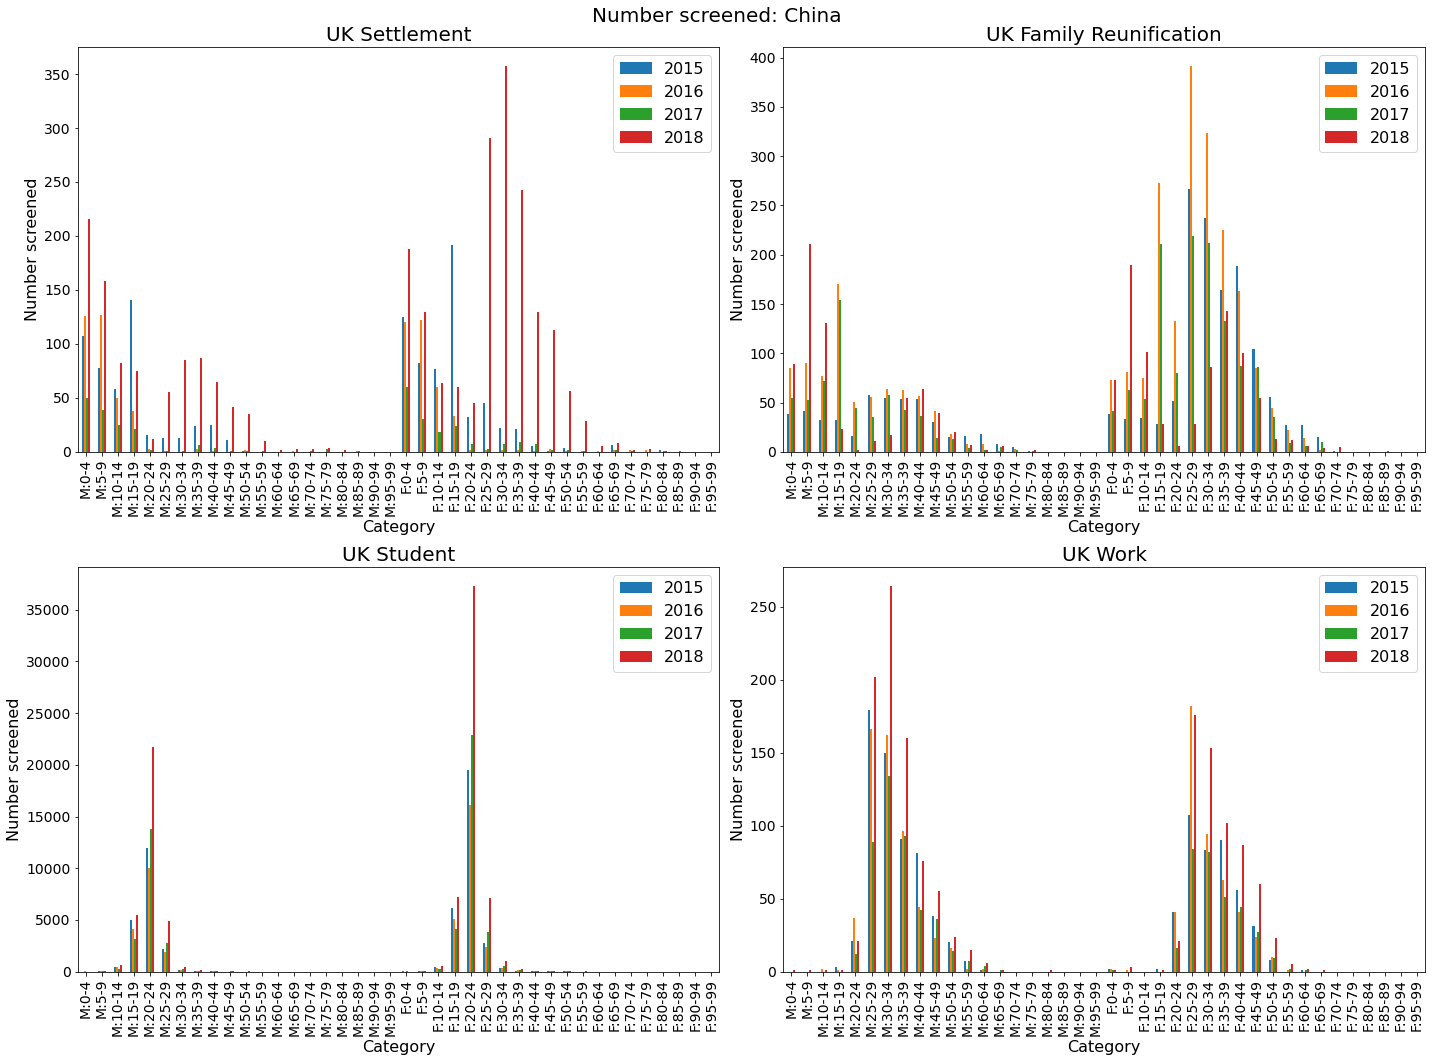

In [10]:
currentRegion = 'China'

n_cols = 2
n_rows = 2
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows)

for i in range(n_cols*n_rows):
    i_row = i // n_cols
    i_col = i % n_cols
    currentVisa = visaSet[i]
    currentAx = ax[i_row, i_col]
    CV = (currentRegion, currentVisa)
    currentMean = MeanAgeSexDistrByCV[CV]

    plot_df = pd.DataFrame({'Labels': names,
                            'Mean': currentMean})

    for y in years:
        currentIndex = CV + (y,)
        plot_df[y] = totalByCVYear[currentIndex]

    plot_df.plot.bar(x='Labels', y=years, rot=90, ax=currentAx)
    currentAx.set_title(currentVisa, fontsize=20)
    currentAx.set_ylabel('Number screened', fontsize=16)
    currentAx.set_xlabel('Category', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=14)
    currentAx.legend(fontsize=16)


fig.set_size_inches(20, 7.5*n_rows)
fig.suptitle(f'Number screened: {currentRegion}', fontsize=20)
fig.tight_layout()
plt.show()

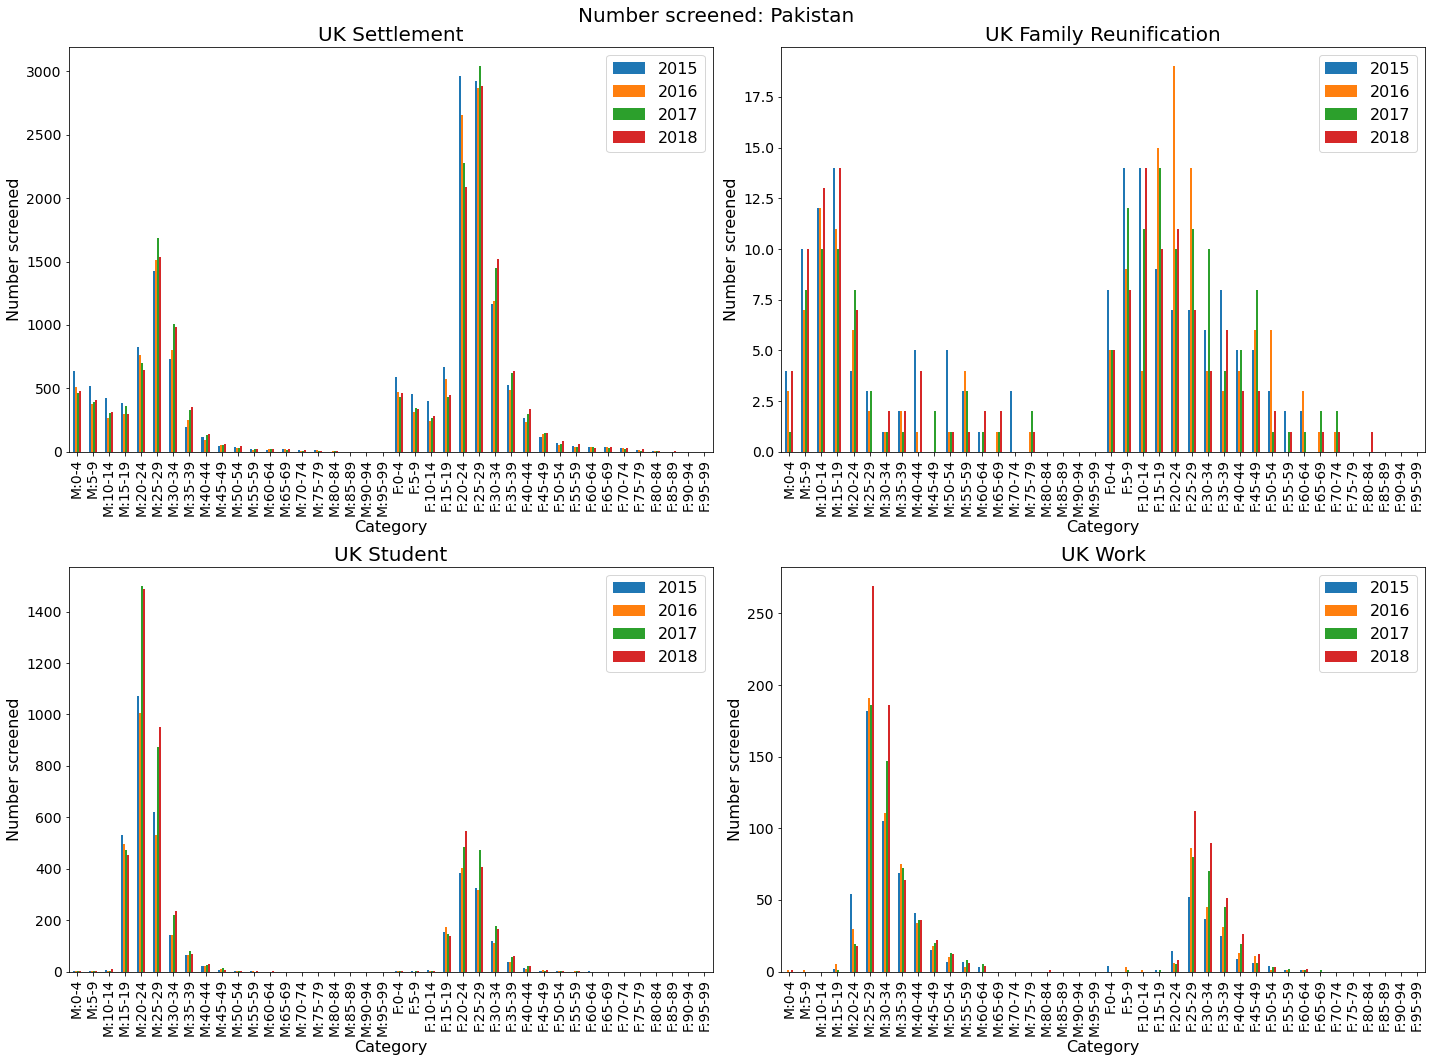

In [11]:
currentRegion = 'Pakistan'

n_cols = 2
n_rows = 2
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows)

for i in range(n_cols*n_rows):
    i_row = i // n_cols
    i_col = i % n_cols
    currentVisa = visaSet[i]
    currentAx = ax[i_row, i_col]
    CV = (currentRegion, currentVisa)
    currentMean = MeanAgeSexDistrByCV[CV]

    plot_df = pd.DataFrame({'Labels': names,
                            'Mean': currentMean})

    for y in years:
        currentIndex = CV + (y,)
        plot_df[y] = totalByCVYear[currentIndex]

    plot_df.plot.bar(x='Labels', y=years, rot=90, ax=currentAx)
    currentAx.set_title(currentVisa, fontsize=20)
    currentAx.set_ylabel('Number screened', fontsize=16)
    currentAx.set_xlabel('Category', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=14)
    currentAx.legend(fontsize=16)


fig.set_size_inches(20, 7.5*n_rows)
fig.suptitle(f'Number screened: {currentRegion}', fontsize=20)
fig.tight_layout()
plt.show()

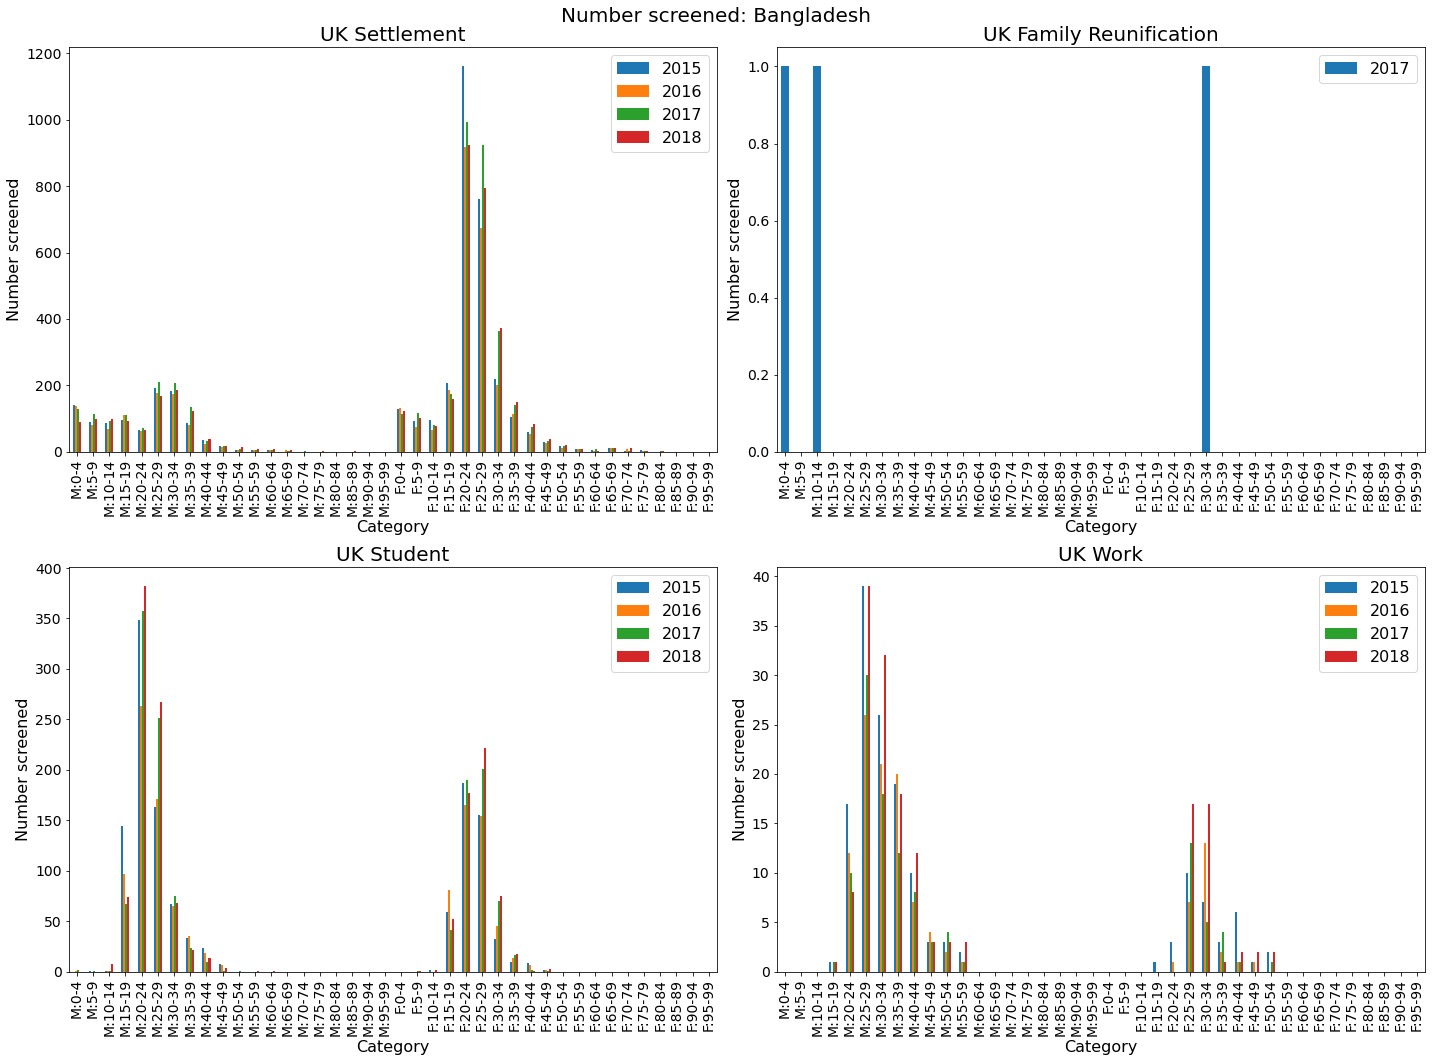

In [12]:
currentRegion = 'Bangladesh'

n_cols = 2
n_rows = 2
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows)

for i in range(n_cols*n_rows):
    i_row = i // n_cols
    i_col = i % n_cols
    currentVisa = visaSet[i]
    currentAx = ax[i_row, i_col]
    CV = (currentRegion, currentVisa)
    currentMean = MeanAgeSexDistrByCV[CV]

    plot_df = pd.DataFrame({'Labels': names,
                            'Mean': currentMean})

    outputYears = []
    for y in years:
        currentIndex = CV + (y,)
        if not np.any(totalByCVYear.index.isin([currentIndex])):
            continue

        plot_df[y] = totalByCVYear[currentIndex]
        outputYears = outputYears + [y]

    plot_df.plot.bar(x='Labels', y=outputYears, rot=90, ax=currentAx)
    currentAx.set_title(currentVisa, fontsize=20)
    currentAx.set_ylabel('Number screened', fontsize=16)
    currentAx.set_xlabel('Category', fontsize=16)
    currentAx.tick_params(axis='both', which='major', labelsize=14)
    currentAx.legend(fontsize=16)


fig.set_size_inches(20, 7.5*n_rows)
fig.suptitle(f'Number screened: {currentRegion}', fontsize=20)
fig.tight_layout()
plt.show()

# Discussion

 * Generally, settlement and reunifcation visa distributions are more changeable over time than the student and work visas. China and India seem particularly variable. 
 * The Bangladesh reunification visa distribution is particularly poor with data only from 2017 and that being very poorly populated. I'm not sure what's going on here.  
 * In terms of numbers screened, several things stand out:
     * In India in 2018, there's a sudden increase in adult settlement visas and a drop in the reunification visa. These seem to match up. 
     * Something similar is happening in China at the same time, but the situation is more complicated. 
     * There really are only 3 people on reunification visas from Bangladesh between 2015 and 2018!